In [1]:
import gym
import os
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
env_name  = 'FrozenLake-v0'
env = gym.make(env_name)
env = env.unwrapped

[0, 3, 3, 3, 0, 0, 2, 0, 3, 1, 0, 0, 0, 2, 1, 0]
time : 8.270227670669556


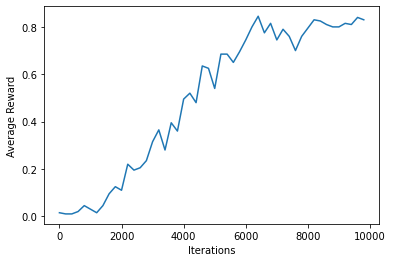

In [4]:
start=time.time()
Q = np.zeros((env.observation_space.n, env.action_space.n))
rewards = []
iterations = []
optimal=[0]*env.observation_space.n
alpha = 0.8
gamma = 0.95
episodes = 30000
epsilon=0
for episode in range(episodes):
    state = env.reset()
    done = False
    t_reward = 0
    max_steps = 1000000
    for i in range(max_steps):
        if done:
            break        
        current = state
        if np.random.rand()<epsilon:
            action = np.argmax(Q[current, :])
        else:
            action = env.action_space.sample()
        
        state, reward, done, info = env.step(action)
        t_reward += reward
        Q[current, action] += alpha * (reward + gamma * np.max(Q[state, :]) - Q[current, action])
    #alpha=2.71**(-episode/1000)
    epsilon=(1-2.71**(-episode/1000))
    #print(epsilon)
    rewards.append(t_reward)
    iterations.append(i)
for k in range(env.observation_space.n):
    optimal[k]=np.argmax(Q[k, :])
print(optimal)
env.close()
end=time.time()
print("time :",end-start)
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

size = int(episodes / 50)
chunks = list(chunk_list(rewards, size))
averages = [sum(chunk) / len(chunk) for chunk in chunks]

plt.plot(range(0, len(rewards), size), averages)
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.show()